In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data = pd.read_csv('winequality-red.csv', sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [42]:
X = data[data.columns[:-1]].values
y = data['quality'].values

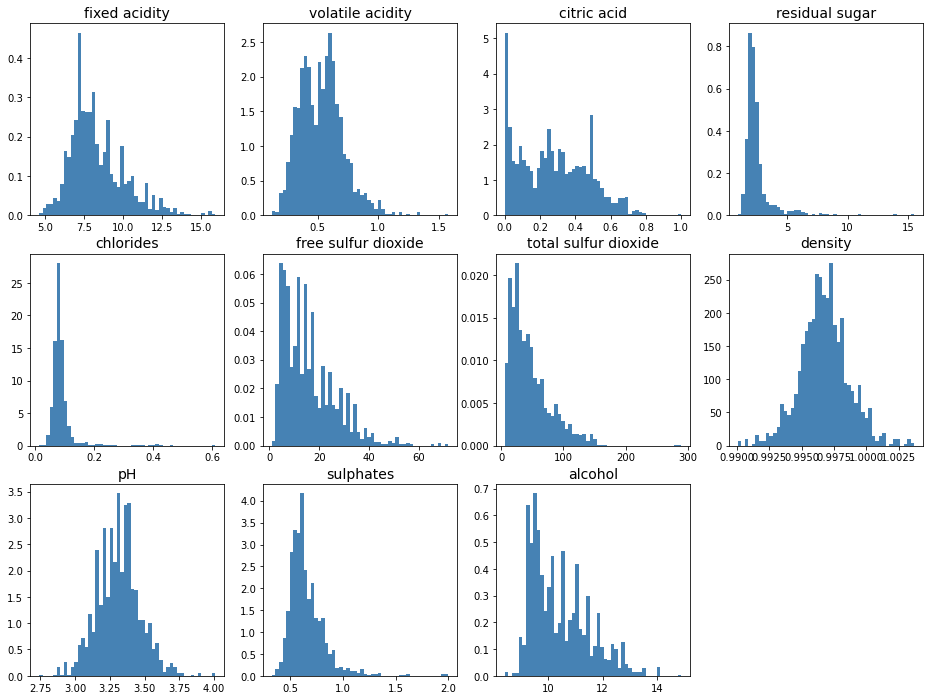

In [43]:
fig = plt.figure(figsize=(16,12))

for feat_idx in range(X.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X[:,feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)

## Selection modele

In [44]:
y_class = np.where(y<6,0,1)

In [45]:
from sklearn import model_selection

In [46]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y_class, test_size=0.3)

In [47]:
from sklearn import preprocessing

In [48]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

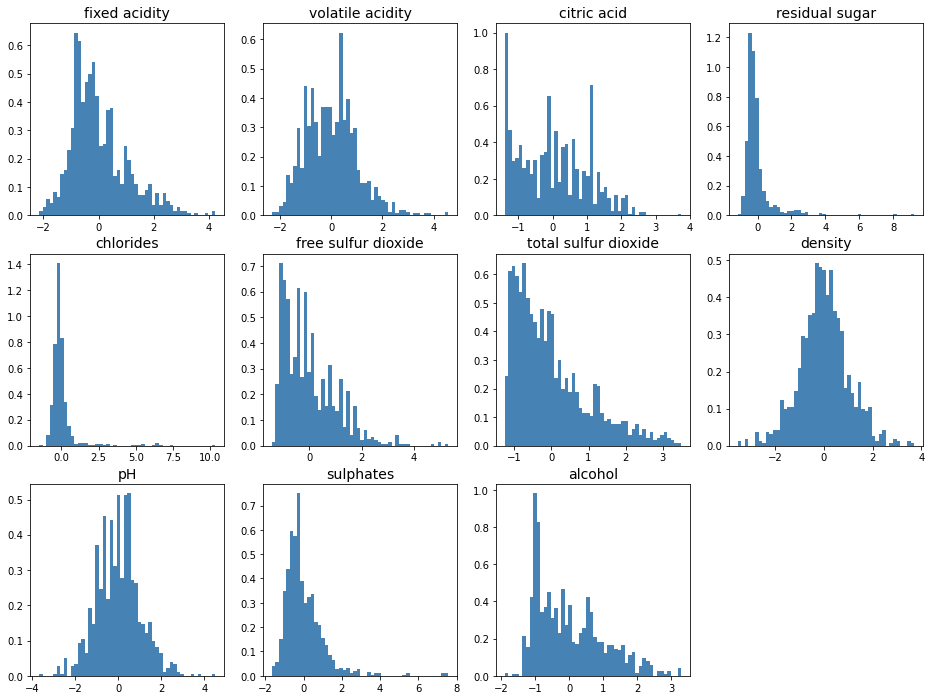

In [49]:
fig = plt.figure(figsize=(16,12))

for feat_idx in range(X_train_std.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X_train_std[:,feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)

## GridSearchCV

In [50]:
from sklearn import neighbors, metrics

In [51]:
param_grid = {'n_neighbors':[3,5,7,9,11,13,15]}
score = 'accuracy'

clf = model_selection.GridSearchCV(neighbors.KNeighborsClassifier(),
                                  param_grid,
                                  cv=5,
                                  scoring=score)

clf.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15]},
             scoring='accuracy')

In [52]:
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 13}


In [53]:
# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Résultats de la validation croisée :
accuracy = 0.715 (+/-0.016) for {'n_neighbors': 3}
accuracy = 0.723 (+/-0.041) for {'n_neighbors': 5}
accuracy = 0.732 (+/-0.041) for {'n_neighbors': 7}
accuracy = 0.739 (+/-0.038) for {'n_neighbors': 9}
accuracy = 0.743 (+/-0.038) for {'n_neighbors': 11}
accuracy = 0.747 (+/-0.028) for {'n_neighbors': 13}
accuracy = 0.741 (+/-0.030) for {'n_neighbors': 15}


In [54]:
y_pred = clf.predict(X_test_std)
print("\nSur le jeu de test : {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))



Sur le jeu de test : 0.731


## Matrice de confusion

In [55]:
metrics.confusion_matrix(y_true, y_pred)

NameError: name 'y_true' is not defined

Text(0, 0.5, 'Sensibilite')

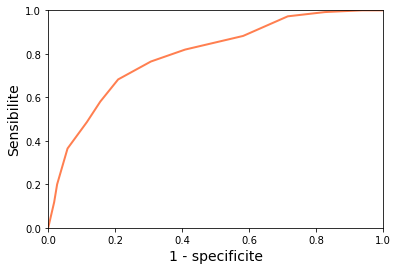

In [56]:
y_pred_proba = clf.predict_proba(X_test_std)[:,1]
[fpr,tpr,thr] = metrics.roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

In [57]:
print(metrics.auc(fpr,tpr))

0.7957734204793029


In [58]:
idx = np.min(np.where(tpr>0.95))

print(f'Sensibilite : {tpr[idx]}')
print(f'Specificite : {1-fpr[idx]}')
print(f'Seuil : {thr[idx]}')

Sensibilite : 0.9725490196078431
Specificite : 0.2844444444444445
Seuil : 0.3076923076923077


# Regression

In [64]:
data = pd.read_csv('winequality-red.csv', sep=";")

X = data[data.columns[:-1]].values
y = data['quality'].values

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3 )
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [65]:
knn = neighbors.KNeighborsRegressor(n_neighbors=11)

knn.fit(X_train_std, y_train)

KNeighborsRegressor(n_neighbors=11)

In [66]:
y_predict = knn.predict(X_test_std)

In [67]:
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test,y_predict))}')

RMSE : 0.6714489287442833


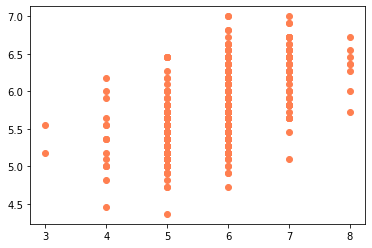

In [68]:
plt.scatter(y_test, y_predict, c='coral')

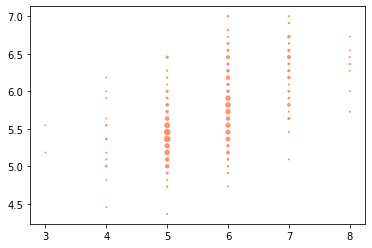

In [69]:
sizes = {}
for (yt,yp) in zip(list(y_test), list(y_predict)):
    if (yt,yp) in sizes :
        sizes[(yt,yp)] += 1
    else:
        sizes[(yt,yp)] = 1
        
keys = sizes.keys()
plt.scatter([k[0] for k in keys],
           [k[1] for k in keys],
           s=[sizes[k] for k in keys],
           c='coral', alpha=0.8)

## Approche naïve

In [70]:
y_pred_random = np.random.randint(np.min(y), np.max(y), y_test.shape)

In [71]:
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test,y_pred_random))}')

RMSE : 1.715735993677349


In [72]:
from sklearn import dummy

In [73]:
dum = dummy.DummyRegressor(strategy='mean')

dum.fit(X_train_std, y_train)

y_pred_dum = dum.predict(X_test_std)

In [74]:
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test,y_pred_dum))}')

RMSE : 0.8228279881308418
